## Khai báo các thư viện cần thiết

In [430]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

 [Đọc dữ liệu đầu vào](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data)

In [431]:
df = pd.read_csv(r'C:\PyThon\test\healthcare-dataset-stroke-data.csv')
df.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


### Kích thước dữ liệu

In [432]:
df.shape

(5110, 12)

## Dữ liệu có 4981 mẫu, 11 thộc tính

### Tên các thuộc tính trong file dữ liệu

In [433]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

### Nhận xét dữ liệu có 11 thuộc tính trong đó 10 thuộc tính đầu là đặc trưng, nhãn là cột stroke

### Một số thông tin cơ bản về dữ liệu

In [434]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Các cột cần mã hóa (Dtype là object):gender, ever_married, work_type, Residence_type, smoking_status
### Dữ liệu thiếu: bmi

#### Một số thống kê cơ bản về dữ liệu

In [435]:
df.describe(include="all")

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [436]:
pd.set_option("display.max_columns", None)

# I, Tiền xử lý dữ liệu

### In ra phần tỷ lệ dữ liệu thiếu của từng cột

In [437]:
print("Tỷ lệ phần trăm dữ liệu thiếu của các thuộc tính:")
print(df.isna().mean()*100)

Tỷ lệ phần trăm dữ liệu thiếu của các thuộc tính:
id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


### bmi thiếu 3.933%

## A. Xử lý dữ liệu thiếu

### Xét cột bmi

##### ***** Thử nghiệm với mean (giá trị trung bình)

In [438]:
mean = df['bmi'].mean()
mean

28.893236911794666

In [439]:
df['bmi_mean'] = df['bmi'].fillna(mean)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_mean
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,36.600000
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,28.893237
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,32.500000
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,34.400000
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,24.000000


##### ***** Thử nghiệm với median (giá trị trung vị)

In [440]:
median = df['bmi'].median()
median

28.1

In [441]:
df['bmi_median'] = df['bmi'].fillna(median)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_mean,bmi_median
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,36.600000,36.6
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,28.893237,28.1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,32.500000,32.5
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,34.400000,34.4
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,24.000000,24.0


##### Biểu đồ về dữ liệu trước khi xử lý và sau khi xử lý dùng mean, median

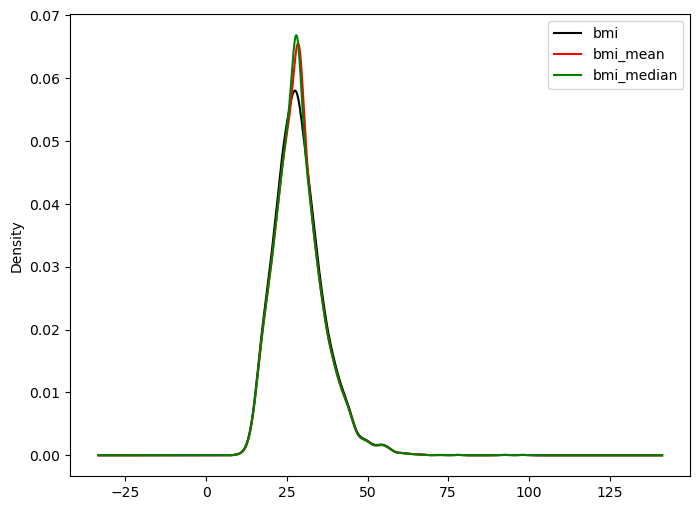

In [442]:
plt.rcParams["figure.figsize"] = [8,6]

fig = plt.figure()
ax = fig.add_subplot(111)

df['bmi'] .plot(kind='kde', ax=ax, color='black')

df['bmi_mean'] .plot(kind='kde', ax=ax, color='red')

df['bmi_median'] .plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [443]:
df['bmi'] = df['bmi'].fillna(median)

In [444]:
df['bmi'].isna().mean()

0.0

In [445]:
df = df.drop(columns=['bmi_median', 'bmi_mean'], axis=1)

## B. Loại bỏ các dữ liệu tuổi không phải là số nguyên

In [446]:
df.shape

(5110, 12)

In [447]:
# Loại bỏ các mãu dữ liệu có tuổi không là số nguyên
for x in df.index:
    if df.loc[x, "age"] != int(df.loc[x, "age"]):
        df.drop(x, inplace = True)

In [448]:
df.shape

(4995, 12)

## B. Mã hóa dữ liệu

##### Các cột dữ liệu cần được mã hóa 

In [449]:
print("Những cột có dữ liệu cần được mã hóa là: ")
for columns in df.columns:
    if df[columns].dtype == 'object':
        print("   +)",columns, ":", df[columns].unique())

Những cột có dữ liệu cần được mã hóa là: 
   +) gender : ['Male' 'Female' 'Other']
   +) ever_married : ['Yes' 'No']
   +) work_type : ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
   +) Residence_type : ['Urban' 'Rural']
   +) smoking_status : ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


### Xét cột gender

In [450]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["gender"] = label_encoder.fit_transform(df["gender"])

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,0,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,0,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Xét cột ever_married

In [451]:
label_encoder = LabelEncoder()
df["ever_married"] = label_encoder.fit_transform(df["ever_married"])

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,0,61.0,0,0,1,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,1,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,60182,0,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1665,0,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1


### Xét cột work_type

In [452]:
df['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
Govt_job          657
children          572
Never_worked       22
Name: count, dtype: int64

In [453]:
# Tính xác suất xuất hiện của các giá trị phân biệt, chuyển thành từ điển
frequency_count = (df['work_type'].value_counts() / len(df['work_type']) ).to_dict()
print(frequency_count)

{'Private': 0.5855855855855856, 'Self-employed': 0.16396396396396395, 'Govt_job': 0.13153153153153152, 'children': 0.11451451451451451, 'Never_worked': 0.004404404404404405}


In [454]:
# hàm map có nhiệm vụ ánh xạ giữa key sang value, gán lại cho cột city
df['work_type'] = df['work_type'].map(frequency_count)

In [455]:
# Kiểu dữ liệu cột city sau khi xử lý
df['work_type'].dtype

dtype('float64')

In [456]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,0.585586,Urban,228.69,36.6,formerly smoked,1
1,51676,0,61.0,0,0,1,0.163964,Rural,202.21,28.1,never smoked,1
2,31112,1,80.0,0,1,1,0.585586,Rural,105.92,32.5,never smoked,1
3,60182,0,49.0,0,0,1,0.585586,Urban,171.23,34.4,smokes,1
4,1665,0,79.0,1,0,1,0.163964,Rural,174.12,24.0,never smoked,1


### Xét cột Residence_type

In [457]:
label_encoder = LabelEncoder()
df["Residence_type"] = label_encoder.fit_transform(df["Residence_type"])

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,0.585586,1,228.69,36.6,formerly smoked,1
1,51676,0,61.0,0,0,1,0.163964,0,202.21,28.1,never smoked,1
2,31112,1,80.0,0,1,1,0.585586,0,105.92,32.5,never smoked,1
3,60182,0,49.0,0,0,1,0.585586,1,171.23,34.4,smokes,1
4,1665,0,79.0,1,0,1,0.163964,0,174.12,24.0,never smoked,1


### Xét cột smoking_status

In [458]:
# In ra các giá trị phân biệt các cột dữ liệu
print(df['smoking_status'].unique())

['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [459]:
# - Thực hiện tạo các từ điển và gán các value có thứ tự cho các giá trị tăng dần (đảm bảo luôn bắt đầu từ 0)
label_smoking_status = {'Unknown':0, 'never smoked':1, 'formerly smoked':2, 'smokes':3}

In [460]:
# Thực hiện dùng hàm map để ánh xạ các cặp key - value tương ứng
df['smoking_status'] = df['smoking_status'].map(label_smoking_status)

In [461]:
# Dữ liệu sau khi mã hóa
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,0.585586,1,228.69,36.6,2,1
1,51676,0,61.0,0,0,1,0.163964,0,202.21,28.1,1,1
2,31112,1,80.0,0,1,1,0.585586,0,105.92,32.5,1,1
3,60182,0,49.0,0,0,1,0.585586,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,0.163964,0,174.12,24.0,1,1


In [462]:
df.shape

(4995, 12)

In [463]:
# Kiểu dữ liệu của các cột sau khi mã hóa (không còn kiểu object)
df.dtypes

id                     int64
gender                 int32
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int32
work_type            float64
Residence_type         int32
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

## D. Xử lí dữ liệu ngoại lệ

<Axes: ylabel='age'>

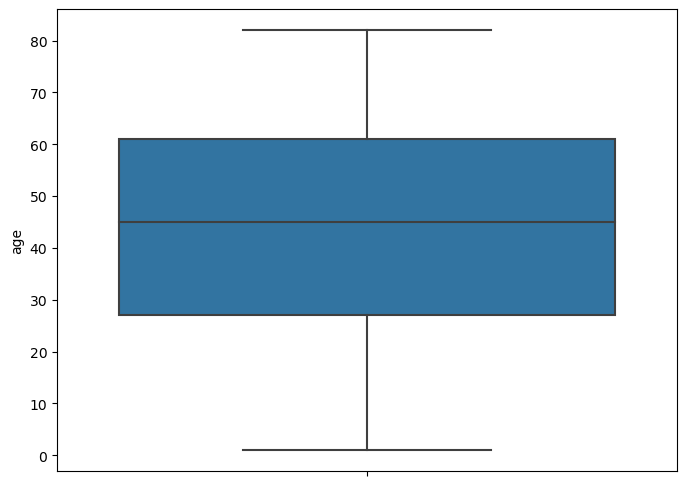

In [464]:
# Vẽ biểu đồ boxplot để xem phân phối dữ liệu và phát hiện phần tử ngoại lệ
sns.boxplot( y='age', data=df)

#### Không có dữ liệu ngoại lệ

### Xét cột avg_glucose_level

<Axes: ylabel='avg_glucose_level'>

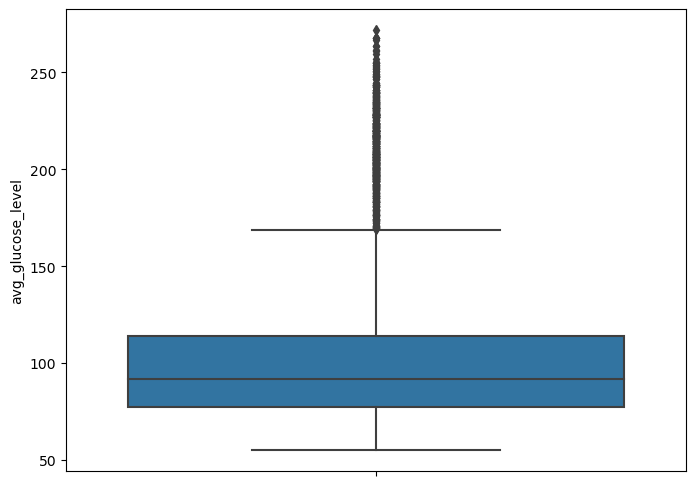

In [465]:
sns.boxplot( y='avg_glucose_level', data=df)

In [466]:
IQR = df["avg_glucose_level"].quantile(0.75) - df["avg_glucose_level"].quantile(0.25)
lower_hours_limit = df["avg_glucose_level"].quantile(0.25) - (IQR * 1.5)
upper_hours_limit = df["avg_glucose_level"].quantile(0.75) + (IQR * 1.5)

print(lower_hours_limit)
print(upper_hours_limit)

22.144999999999996
169.385


In [467]:
# Những giá trị lớn hơn cận gán bằng cận trên, nhỏ hơn cận dưới gán bằng cận dưới, còn lại giữ nguyên
df["avg_glucose_level"] = np.where(df['avg_glucose_level'] > upper_hours_limit, upper_hours_limit,
             np.where(df["avg_glucose_level"] < lower_hours_limit, lower_hours_limit, df["avg_glucose_level"]))

<Axes: ylabel='avg_glucose_level'>

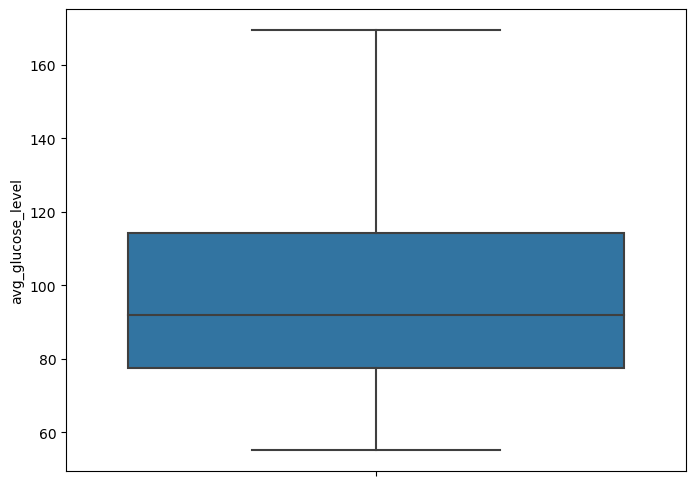

In [468]:
sns.boxplot( y='avg_glucose_level', data=df)

#### Xét cột bmi

<Axes: ylabel='bmi'>

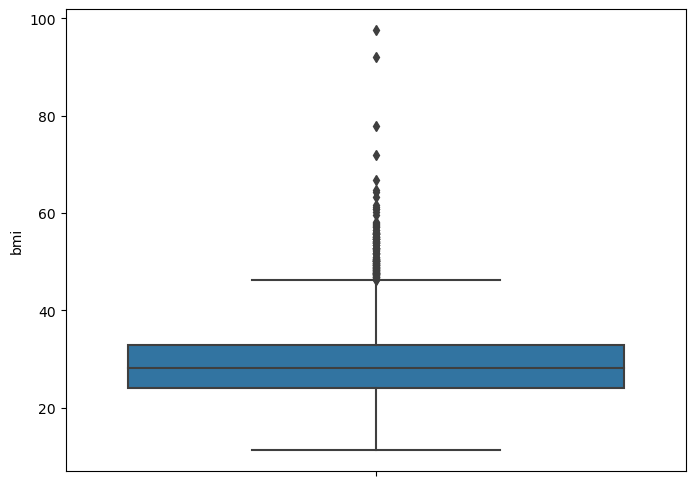

In [469]:
sns.boxplot( y='bmi', data=df)

In [470]:
IQR = df["bmi"].quantile(0.75) - df["bmi"].quantile(0.25)
lower_hours_limit = df["bmi"].quantile(0.25) - (IQR * 1.5)
upper_hours_limit = df["bmi"].quantile(0.75) + (IQR * 1.5)

print(lower_hours_limit)
print(upper_hours_limit)

10.825
46.22500000000001


In [471]:
# Những giá trị lớn hơn cận gán bằng cận trên, nhỏ hơn cận dưới gán bằng cận dưới, còn lại giữ nguyên
df["bmi"] = np.where(df['bmi'] > upper_hours_limit, upper_hours_limit,
             np.where(df["bmi"] < lower_hours_limit, lower_hours_limit, df["bmi"]))

<Axes: ylabel='bmi'>

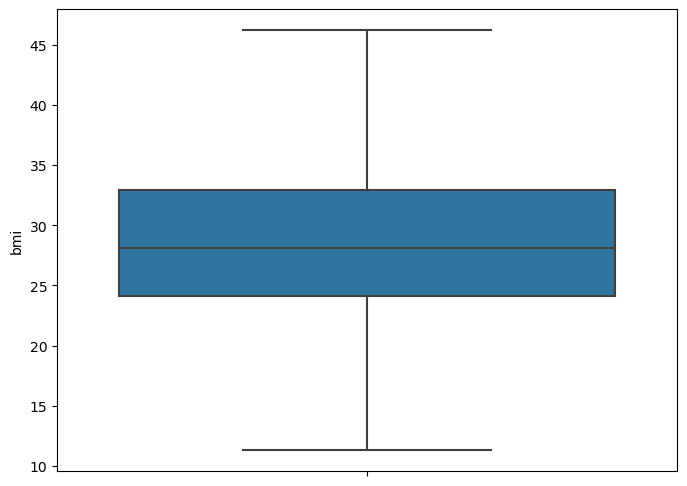

In [472]:
sns.boxplot( y='bmi', data=df)

## E. Chuẩn hóa dữ liệu 

In [473]:
# In ra dữ liệu
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,0.585586,1,169.385,36.6,2,1
1,51676,0,61.0,0,0,1,0.163964,0,169.385,28.1,1,1
2,31112,1,80.0,0,1,1,0.585586,0,105.920,32.5,1,1
3,60182,0,49.0,0,0,1,0.585586,1,169.385,34.4,3,1
4,1665,0,79.0,1,0,1,0.163964,0,169.385,24.0,1,1
5,56669,1,81.0,0,0,1,0.585586,1,169.385,29.0,2,1
6,53882,1,74.0,1,1,1,0.585586,0,70.090,27.4,1,1
7,10434,0,69.0,0,0,0,0.585586,1,94.390,22.8,1,1
8,27419,0,59.0,0,0,1,0.585586,0,76.150,28.1,0,1
9,60491,0,78.0,0,0,1,0.585586,1,58.570,24.2,0,1


##### Dùng phương pháp Min/Max Scaling cho toàn tập dữ liệu (dễ hiểu, dễ thực hiện, bảo toàn phân phối gốc)

<Axes: xlabel='bmi', ylabel='Density'>

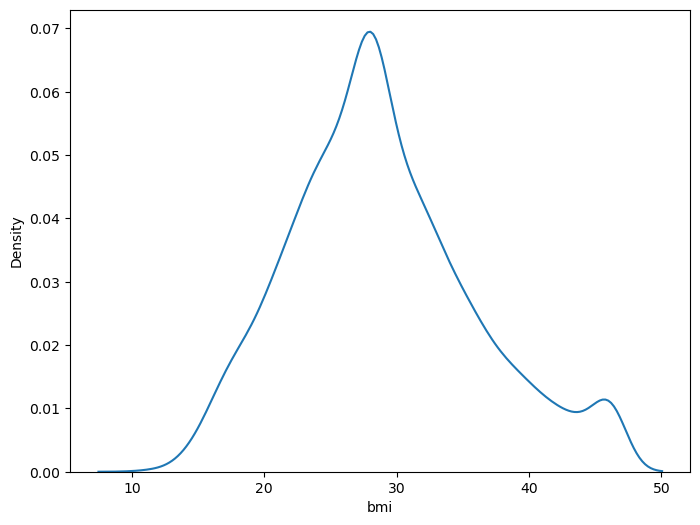

In [474]:
sns.kdeplot(df['bmi'])

In [475]:
# Chuẩn hóa theo công thức X_new = (X_old - min)/(max - min)
for columns in df.columns:
    max = df[columns].max()
    min = df[columns].min()
    df[columns] = (df[columns] - min)/(max - min)

In [476]:
# Dữ liệu sau khi chuẩn hóa
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.123214,0.5,0.814815,0.0,1.0,1.0,1.000000,1.0,1.000000,0.724409,0.666667,1.0
1,0.708205,0.0,0.740741,0.0,0.0,1.0,0.274544,0.0,1.000000,0.481031,0.333333,1.0
2,0.426015,0.5,0.975309,0.0,1.0,1.0,1.000000,0.0,0.444581,0.607015,0.333333,1.0
3,0.824928,0.0,0.592593,0.0,0.0,1.0,1.000000,1.0,1.000000,0.661417,1.000000,1.0
4,0.021929,0.0,0.962963,1.0,0.0,1.0,0.274544,0.0,1.000000,0.363636,0.333333,1.0
5,0.776721,0.5,0.987654,0.0,0.0,1.0,1.000000,1.0,1.000000,0.506800,0.666667,1.0
6,0.738477,0.5,0.901235,1.0,1.0,1.0,1.000000,0.0,0.131011,0.460988,0.333333,1.0
7,0.142261,0.0,0.839506,0.0,0.0,0.0,1.000000,1.0,0.343675,0.329277,0.333333,1.0
8,0.375338,0.0,0.716049,0.0,0.0,1.0,1.000000,0.0,0.184046,0.481031,0.000000,1.0
9,0.829169,0.0,0.950617,0.0,0.0,1.0,1.000000,1.0,0.030193,0.369363,0.000000,1.0


<Axes: xlabel='bmi', ylabel='Density'>

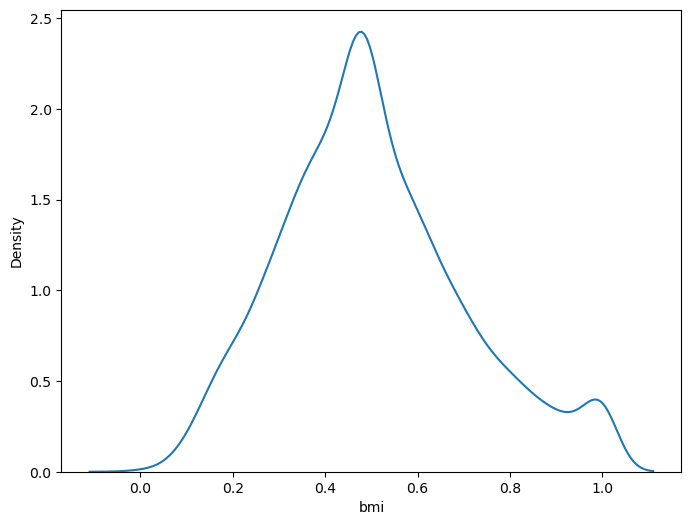

In [477]:
sns.kdeplot(df['bmi'])

### ===>Dữ liệu sau khi thực hiện các kỹ thuật tiền xử lý dữ liệu

In [478]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.123214,0.5,0.814815,0.0,1.0,1.0,1.000000,1.0,1.000000,0.724409,0.666667,1.0
1,0.708205,0.0,0.740741,0.0,0.0,1.0,0.274544,0.0,1.000000,0.481031,0.333333,1.0
2,0.426015,0.5,0.975309,0.0,1.0,1.0,1.000000,0.0,0.444581,0.607015,0.333333,1.0
3,0.824928,0.0,0.592593,0.0,0.0,1.0,1.000000,1.0,1.000000,0.661417,1.000000,1.0
4,0.021929,0.0,0.962963,1.0,0.0,1.0,0.274544,0.0,1.000000,0.363636,0.333333,1.0
5,0.776721,0.5,0.987654,0.0,0.0,1.0,1.000000,1.0,1.000000,0.506800,0.666667,1.0
6,0.738477,0.5,0.901235,1.0,1.0,1.0,1.000000,0.0,0.131011,0.460988,0.333333,1.0
7,0.142261,0.0,0.839506,0.0,0.0,0.0,1.000000,1.0,0.343675,0.329277,0.333333,1.0
8,0.375338,0.0,0.716049,0.0,0.0,1.0,1.000000,0.0,0.184046,0.481031,0.000000,1.0
9,0.829169,0.0,0.950617,0.0,0.0,1.0,1.000000,1.0,0.030193,0.369363,0.000000,1.0


In [479]:
df.shape

(4995, 12)

In [480]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4995 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4995 non-null   float64
 1   gender             4995 non-null   float64
 2   age                4995 non-null   float64
 3   hypertension       4995 non-null   float64
 4   heart_disease      4995 non-null   float64
 5   ever_married       4995 non-null   float64
 6   work_type          4995 non-null   float64
 7   Residence_type     4995 non-null   float64
 8   avg_glucose_level  4995 non-null   float64
 9   bmi                4995 non-null   float64
 10  smoking_status     4995 non-null   float64
 11  stroke             4995 non-null   float64
dtypes: float64(12)
memory usage: 636.3 KB


# II, Ứng dụng mô hình học máy cho dữ liệu bài toán

In [481]:
# Khai báo thư viện cần thiết để phân chia dữ liệu
from sklearn.model_selection import train_test_split

In [482]:
# Dữ liệu đầu vào
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.123214,0.5,0.814815,0.0,1.0,1.0,1.000000,1.0,1.000000,0.724409,0.666667,1.0
1,0.708205,0.0,0.740741,0.0,0.0,1.0,0.274544,0.0,1.000000,0.481031,0.333333,1.0
2,0.426015,0.5,0.975309,0.0,1.0,1.0,1.000000,0.0,0.444581,0.607015,0.333333,1.0
3,0.824928,0.0,0.592593,0.0,0.0,1.0,1.000000,1.0,1.000000,0.661417,1.000000,1.0
4,0.021929,0.0,0.962963,1.0,0.0,1.0,0.274544,0.0,1.000000,0.363636,0.333333,1.0
5,0.776721,0.5,0.987654,0.0,0.0,1.0,1.000000,1.0,1.000000,0.506800,0.666667,1.0
6,0.738477,0.5,0.901235,1.0,1.0,1.0,1.000000,0.0,0.131011,0.460988,0.333333,1.0
7,0.142261,0.0,0.839506,0.0,0.0,0.0,1.000000,1.0,0.343675,0.329277,0.333333,1.0
8,0.375338,0.0,0.716049,0.0,0.0,1.0,1.000000,0.0,0.184046,0.481031,0.000000,1.0
9,0.829169,0.0,0.950617,0.0,0.0,1.0,1.000000,1.0,0.030193,0.369363,0.000000,1.0


In [483]:
# Kích thước dữ liệu đầu vào
df.shape

(4995, 12)

In [484]:
# Xóa cột enrollee_id, không làm ảnh hưởng đến mô hình
df.drop(['id'], axis=1, inplace=True)

In [485]:
# In lại dữ liệu
df.head(100)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.5,0.814815,0.0,1.0,1.0,1.000000,1.0,1.000000,0.724409,0.666667,1.0
1,0.0,0.740741,0.0,0.0,1.0,0.274544,0.0,1.000000,0.481031,0.333333,1.0
2,0.5,0.975309,0.0,1.0,1.0,1.000000,0.0,0.444581,0.607015,0.333333,1.0
3,0.0,0.592593,0.0,0.0,1.0,1.000000,1.0,1.000000,0.661417,1.000000,1.0
4,0.0,0.962963,1.0,0.0,1.0,0.274544,0.0,1.000000,0.363636,0.333333,1.0
...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.950617,0.0,0.0,1.0,1.000000,0.0,1.000000,0.601288,0.333333,1.0
96,0.0,0.851852,0.0,0.0,1.0,0.274544,0.0,0.185709,0.375089,0.666667,1.0
97,0.5,0.703704,0.0,1.0,1.0,1.000000,0.0,1.000000,0.575519,1.000000,1.0
98,0.5,0.691358,1.0,0.0,1.0,0.218739,1.0,0.208288,0.469578,0.666667,1.0


In [486]:
# Chia dữ liệu thành tập train:test 70:30 cột target là nhãn, các cột còn lại là đặc trưng
dtTrain, dtTest = train_test_split(df, test_size=0.3, shuffle=True)
y_train = dtTrain.loc[:, 'stroke']
y_test = dtTest.loc[:, 'stroke']
X_train = dtTrain.drop(['stroke'], axis=1)
X_test = dtTest.drop(['stroke'], axis=1)

#### Dùng mô hình Support Vector Meachine

In [487]:
# Khai báo thư viện mô hình SVM
from sklearn.svm import SVC

In [488]:
# Huấn luyện mô hình với tập dữ liệu trên
model = SVC(kernel='rbf', C=10)
model.fit(X_train.values, y_train.values)
y_pred = model.predict(X_test)

c:\Users\Hi\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [489]:
# Tính các độ đo chất lượng
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

# In các độ đo chất lượng
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9459639759839893
Precision: 0.9229945939433424
Recall: 0.9459639759839893
F1 Score: 0.9222030090293025


## Xử dụng mô hình Perceptron

In [490]:
# Khai báo thư viện mô hình Perceptron
from sklearn.linear_model import Perceptron

In [491]:
# Huấn luyện mô hình với tập dữ liệu trên
model = Perceptron(max_iter=9999)
model.fit(X_train.values, y_train.values)
y_pred = model.predict(X_test)

c:\Users\Hi\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but Perceptron was fitted without feature names
  warnings.warn(


In [492]:
# Tính các độ đo chất lượng
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

# In các độ đo chất lượng
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9459639759839893
Precision: 0.9488838678754482
Recall: 0.9459639759839893
F1 Score: 0.9196962070245436


### Xử dụng mô hình hình Logistic Regression

In [493]:
from sklearn.linear_model import LogisticRegression

In [494]:
# Huấn luyện mô hình với tập dữ liệu trên
model = LogisticRegression()
model.fit(X_train.values, y_train.values)
y_pred = model.predict(X_test)

c:\Users\Hi\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [495]:
# In ra các độ đo đánh giá mô hình
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

# In các độ đo chất lượng
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9459639759839893
Precision: 0.9488838678754482
Recall: 0.9459639759839893
F1 Score: 0.9196962070245436


## Mô hình học kết hợp

In [496]:
from sklearn.ensemble import VotingClassifier

In [497]:
base_models = [
    ('lr', LogisticRegression()),
    ('svm', SVC(kernel='rbf', C=10)),
    ('pct',Perceptron(max_iter=9999))
]

In [498]:
voting_classifier = VotingClassifier(estimators=base_models, voting='hard')

In [499]:
voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()), ('svm', SVC(C=10)),
                             ('pct', Perceptron(max_iter=9999))])

In [500]:
accuracy = voting_classifier.score(X_test, y_test)
precision = precision_score(y_test, y_pred, average='weighted',zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9459639759839893
Precision: 0.9488838678754482
Recall: 0.9459639759839893
F1 Score: 0.9196962070245436
